#  KMeans Clustering

## Target Marketing Campaign
***

The dataset contains patient data to what type of campaign they responded to via a company's healthcare data app. They would send out reminders about their healthcare regulations and each patient has been **targeted** with these campaigns:
1. Emails
2. SMS
3. Whatsapp 
4. Pamphlets
5. Telephone
6. Long Letters

**The Objective** here is to cluster the patients and understand which campaign yielded the best response. This is important because you'll be saving money and stay focused on the things that work, rather than sending many campaigns that the patients will ignore. 

## Import Libraries
***

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import Campaign Response Dataset
***

In [7]:
# Import the campaign dataset from Excel (Sheet 0 = Non Responders, Sheet 1 = Responders)
campaign_type = pd.read_excel('campaign_response.xlsx',sheetname = 0)

# Adding a column of value 1 to act as a count for the response instance
campaign_response = pd.read_excel('campaign_response.xlsx',sheetname = 1)
campaign_response['response'] = 1

## Dataset 1 - Campaign Type
***

Contains a list of 32 different campaigns

In [8]:
print ("Contains campaign size of: " + str(len(campaign_type)))
campaign_type.head(10)

Contains campaign size of: 32


,CampaignID,Type,Month
0,1,email,January
1,2,email,January
2,3,SMS,February
3,4,WhatsApp,February
4,5,Long letter,February
5,6,Telephone,March
6,7,Telephone,March
7,8,SMS,March
8,9,Pamphlet,April
9,10,Telephone,April


## Dataset 2 - Campaign Response
***

Contains a list of 324 different patient responses

In [12]:
print ("Contains patient response size of: {}" .format(str(len(campaign_response))))
campaign_response.head(10)

Contains patient response size of: 324


,Patient,CampaignID,response
0,10,1,1
1,23,1,1
2,24,1,1
3,40,1,1
4,55,1,1
5,69,1,1
6,72,1,1
7,82,1,1
8,89,1,1
9,97,1,1


## Merge Both Datasets
***

In [11]:
# Merge on the CampaignID columns
merge_campaign = pd.merge(campaign_type, campaign_response, on = 'CampaignID')

print('\n The shape of the merged dataset is {}'.format(str(merge_campaign.shape)))

merge_campaign.head()


 The shape of the merged dataset is (324, 5)


,CampaignID,Type,Month,Patient,response
0,1,email,January,10,1
1,1,email,January,23,1
2,1,email,January,24,1
3,1,email,January,40,1
4,1,email,January,55,1


## Create Pivot Table of Patients & Campaign Responses
***

In [16]:
# Create a pivot table to track each campaign response 
pivot_campaign = merge_campaign.pivot_table(index = ['Patient'], columns = ['CampaignID'], values = 'response')

pivot_campaign.head()

CampaignID,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Patient,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### Fill NaN to 0's

In [17]:
# Fill NA values with 0 and reset the index to CampaignID
pivot_campaign = pivot_campaign.fillna(0).reset_index()

pivot_campaign.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# KMeans Clustering
***

## Import Necessary Libraries

In [15]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Plot Elbow Curve
***

Cluster size 2 or 3 looks most reasonable

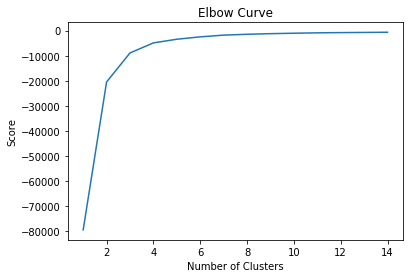

In [23]:
# Create K Clusters of 15
k = range(1,15)

# Instantiate and Fit KMeans of Clusters 1-15
kmeans = [KMeans(n_clusters = i) for i in k]
score = [kmeans[i].fit(pivot_campaign[pivot_campaign.columns[0:]]).\
          score(pivot_campaign[pivot_campaign.columns[0:]]) for i in range(len(kmeans))]

# Plot the Elbow Method
pl.plot(k,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Create 3 Clusters

In [24]:
# Choose Cluster Size of 3
cluster = KMeans(n_clusters = 3)  # At least 7-times times cluster = patients

# Predict the cluster from first patient down all the rows
pivot_campaign['cluster'] = cluster.fit_predict(pivot_campaign[pivot_campaign.columns[0:]])

In [28]:
pivot_campaign.head()

CampaignID,Patient,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


## Visualization
***

**PCA:** We'll perform PCA to reduce our dimensions so we can visually see our cluster segements
Let's apply PCA to visualize this into 2-Dimensions

In [30]:
# Principal component separation to create a 2-dimensional picture
pca = PCA(n_components = 2)

pivot_campaign['x'] = pca.fit_transform(pivot_campaign.iloc[:,1:33])[:,0]
pivot_campaign['y'] = pca.fit_transform(pivot_campaign.iloc[:,1:33])[:,1]

pivot_campaign = pivot_campaign.reset_index()

In [31]:
pivot_campaign.head()

CampaignID,index,Patient,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,cluster,x,y
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0.975682,0.177733
1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-0.307802,0.071641
2,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.416673,0.992914
3,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.547440,-0.609382
4,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,-0.379452,-0.753825


## Plot the 3 Clusters 
***

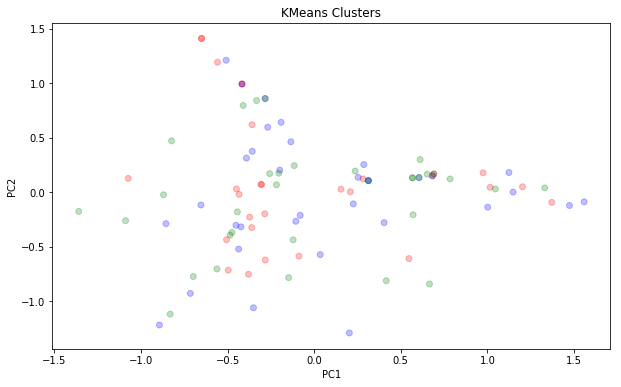

In [33]:
kmeans_color = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in cluster.labels_]

fig = plt.figure(figsize=(10,6))

plt.scatter(x ='x', y ='y',data = pivot_campaign,alpha = 0.25,color = kmeans_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

## Final Merge of Datasets

In [35]:
# Tidy up our Data
campaign_cluster = pivot_campaign[['Patient','cluster','x','y']]
campaign_cluster.head()

CampaignID,Patient,cluster,x,y
0,1,1,0.975682,0.177733
1,2,1,-0.307802,0.071641
2,3,1,-0.416673,0.992914
3,4,1,0.547440,-0.609382
4,5,1,-0.379452,-0.753825


In [36]:
# Merge back together
final_campaign = pd.merge(campaign_response,campaign_cluster)
final_campaign = pd.merge(campaign_type,final_campaign)
final_campaign.head()

,CampaignID,Type,Month,Patient,response,cluster,x,y
0,1,email,January,10,1,1,-0.282221,-0.622973
1,1,email,January,23,1,1,-0.496037,-0.715865
2,1,email,January,24,1,1,-1.073771,0.126451
3,1,email,January,40,1,2,-0.856150,-0.289071
4,1,email,January,55,1,2,-0.357379,0.375035


# Target Campaign
***

### Cluster 1
Responded well to: 
- Whatsapp
- Email

Didn't respond well to:
- Telephone

In [37]:
# e-mails, short-message services, WhatsApp messages, pamphlets, telephone and long letters
final_campaign['cluster_1'] = final_campaign.cluster == 0

final_campaign.groupby('cluster_1').Type.value_counts()

cluster_1  Type       
False      WhatsApp       65
           email          51
           SMS            35
           Telephone      30
           Long letter    20
           Pamphlet        6
True       WhatsApp       36
           email          25
           SMS            22
           Telephone      13
           Long letter    12
           Pamphlet        9
Name: Type, dtype: int64

### Cluster 2

Responded well to: 
- WhatsApp 
- Email

Didn't respond well to:
- SMS
- Telephone


In [38]:
# e-mails, short-message services, WhatsApp messages, pamphlets, telephone and long letters
final_campaign['cluster_2'] = final_campaign.cluster == 1

final_campaign.groupby('cluster_2').Type.value_counts()

cluster_2  Type       
False      WhatsApp       71
           SMS            45
           email          45
           Telephone      33
           Long letter    22
           Pamphlet       11
True       email          31
           WhatsApp       30
           SMS            12
           Long letter    10
           Telephone      10
           Pamphlet        4
Name: Type, dtype: int64

### Cluster 3
Contains people who responded well to WhatsApp and Telephone, but don't respond well to Email.

Responded well to: 
- Whatsapp


Didn't respond well to:
- Pamphlet


In [39]:
# e-mails, short-message services, WhatsApp messages, pamphlets, telephone and long letters
final_campaign['cluster_3'] = final_campaign.cluster == 2

final_campaign.groupby('cluster_3').Type.value_counts()

cluster_3  Type       
False      WhatsApp       66
           email          56
           SMS            34
           Telephone      23
           Long letter    22
           Pamphlet       13
True       WhatsApp       35
           SMS            23
           Telephone      20
           email          20
           Long letter    10
           Pamphlet        2
Name: Type, dtype: int64

## Sending the targeted campaign
***

Since we know that Cluster 1 responds really well to **email and whatsapp**, the next possible thing we can do is to perform A/B Testing with these two platforms and narrow down our focus even more. 

In [40]:
# Number of patients in this cluster
print('Total respondents: {}'.format(str(final_campaign[final_campaign.cluster==0]['Patient'].count())))

# Show all respondents to cluster 1
final_campaign[final_campaign.cluster==0]['Patient']

Total respondents: 117


5      69
6      72
7      82
8      89
9      97
13     69
18     78
19     84
24     75
25     79
27     82
28     89
34     81
35     91
36     93
37     98
38     82
39     81
40     71
41     74
42     82
44     75
46     91
47     98
52     83
53     99
55     79
69     76
70     77
71     87
       ..
234    69
235    82
236    89
240    78
241    81
242    81
249    69
252    91
253    98
269    77
270    94
273    68
274    85
277    92
280    88
283    72
284    89
293    68
294    85
295    96
297    95
300    67
302    88
304    72
305    97
308    91
312    99
314    77
315    96
322    99
Name: Patient, Length: 117, dtype: int64